<a href="https://colab.research.google.com/github/alekrul/RL/blob/main/Epsilon_Greedy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
NUM_TRIALS = 1000
EPS = 0.1
BANDIT_PROB = [0.2, 0.5, 0.75]

In [ ]:
class Bandit:
  def __init__(self,p):
    self.p = p
    self.p_estimate = 0
    self.N = 1 #num samples collected so far

  def pull(self):
    return np.random.random() < self.p

  def update(self, x):
    self.N += 1.
    self.p_estimate = ((self.N - 1)*self.p_estimate + x)/self.N

In [ ]:
def experiment(decaying = False, EPS = 0.1):
  bandits = [Bandit(p) for p in BANDIT_PROB]

  rewards = np.zeros(NUM_TRIALS)
  num_times_explored = 0
  num_times_exploited = 0 
  num_optimal = 0
  optimal_j = np.argmax([b.p for b in bandits])
  print("optimal j:", optimal_j)

  for i in range(NUM_TRIALS):
    if decaying:
      EPSdecay = EPS*(NUM_TRIALS - i)/NUM_TRIALS
    else:
      EPSdecay = EPS
    
    if np.random.random() < EPSdecay:
      num_times_explored += 1
      j = np.random.randint(len(bandits))
    else:
      num_times_exploited += 1
      j = np.argmax([b.p_estimate for b in bandits])

    if j == optimal_j:
      num_optimal += 1

    x = bandits[j].pull()

    rewards[i] = x

    bandits[j].update(x)

  for b in bandits:
    print("mean estimate:", b.p_estimate)
  print("total reward earned:", rewards.sum())
  print("Overall win rate:", rewards.sum()/NUM_TRIALS)
  print("num_times_explored", num_times_explored)
  print("num_times_exploited", num_times_exploited)
  print("num times selected optimal bandit", num_optimal)

  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) +1)
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROB))
  plt.show()

optimal j: 2
mean estimate: 0.18421052631578946
mean estimate: 0.43333333333333335
mean estimate: 0.7508021390374334
total reward earned: 722.0
Overall win rate: 0.722
num_times_explored 106
num_times_exploited 894
num times selected optimal bandit 934


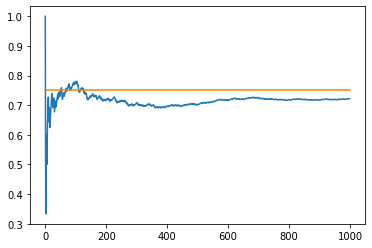

In [ ]:
experiment(decaying = False, EPS = 0.1)

optimal j: 2
mean estimate: 0.14285714285714285
mean estimate: 0.5
mean estimate: 0.763541666666667
total reward earned: 747.0
Overall win rate: 0.747
num_times_explored 53
num_times_exploited 947
num times selected optimal bandit 959


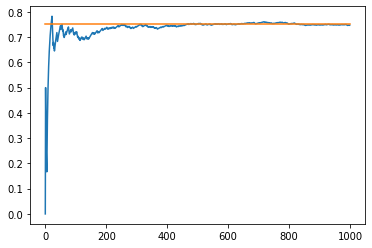

In [ ]:
experiment(decaying = True, EPS = 0.1)

optimal j: 2
mean estimate: 0.14864864864864866
mean estimate: 0.4117647058823529
mean estimate: 0.7375145180023234
total reward earned: 674.0
Overall win rate: 0.674
num_times_explored 189
num_times_exploited 811
num times selected optimal bandit 860


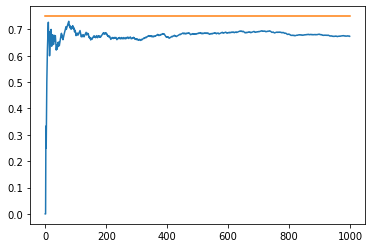

In [ ]:
experiment(decaying = False, EPS = 0.2)

optimal j: 2
mean estimate: 0.18681318681318682
mean estimate: 0.5176470588235291
mean estimate: 0.7557436517533251
total reward earned: 686.0
Overall win rate: 0.686
num_times_explored 92
num_times_exploited 908
num times selected optimal bandit 826


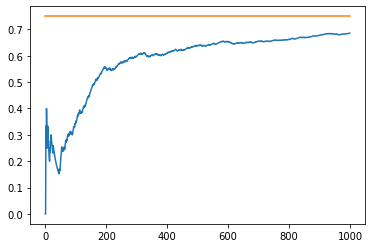

In [ ]:
experiment(decaying = True, EPS = 0.2)

optimal j: 2
mean estimate: 0.10526315789473684
mean estimate: 0.3448275862068966
mean estimate: 0.7382198952879584
total reward earned: 717.0
Overall win rate: 0.717
num_times_explored 39
num_times_exploited 961
num times selected optimal bandit 954


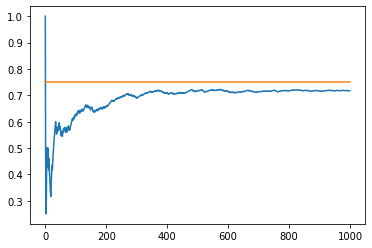

In [ ]:
experiment(5.)